# Shopper Clustering Project
Data: https://www.kaggle.com/roshansharma/online-shoppers-intention

In [1]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# check general information about data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The first 8 items in the data set contain nulls. Possible some data was collected before this info was available?

#### Yes/No Plots

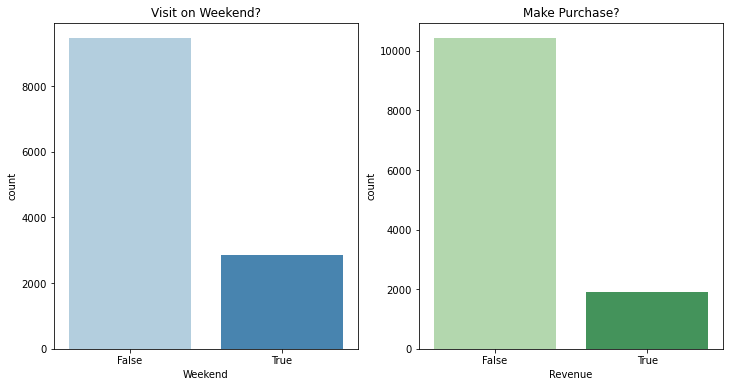

In [16]:
f, axes = plt.subplots(ncols=2,figsize=(12,6))

sns.countplot(df['Weekend'], palette='Blues', ax=axes[0])
axes[0].set_title('Visit on Weekend?')
sns.countplot(df['Revenue'], palette='Greens', ax=axes[1])
axes[1].set_title('Make Purchase?')

plt.show()

#### Categorical Plots

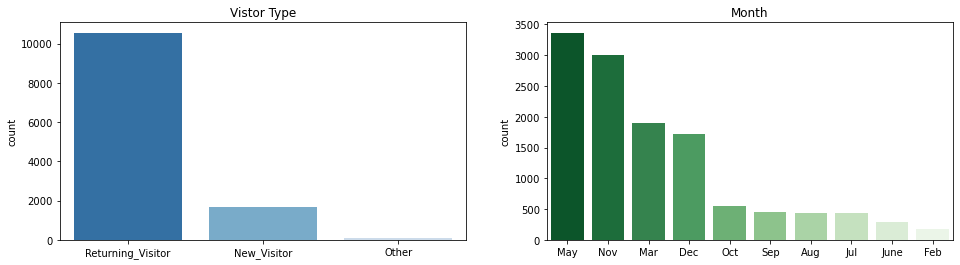

In [62]:
f, axes = plt.subplots(ncols=2,figsize=(16,4))

sns.countplot(df['VisitorType'], palette='Blues_r', ax=axes[0])
axes[0].set_title('Vistor Type')
axes[0].set_xlabel(None)
sns.countplot(df['Month'], palette='Greens_r', ax=axes[1], order=df['Month'].value_counts().index)
axes[1].set_title('Month')
axes[1].set_xlabel(None)
plt.show()

#### Technological Demographics

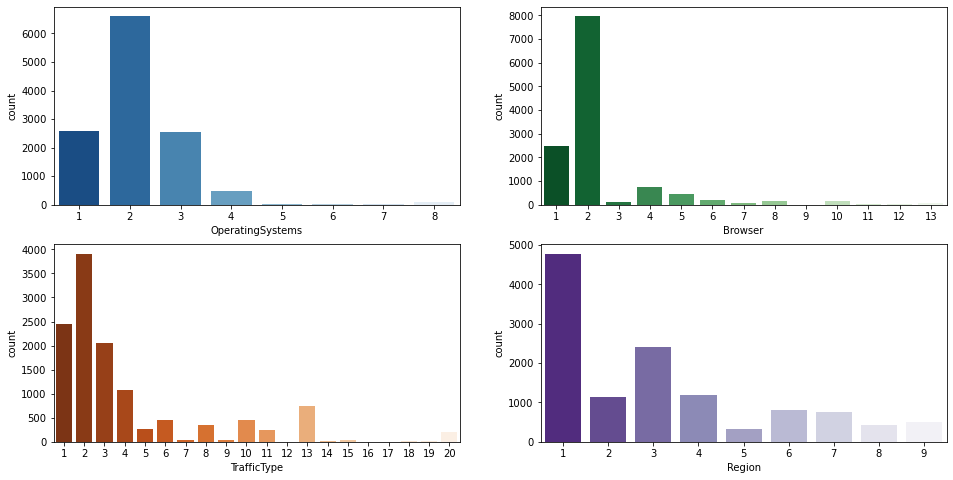

In [76]:
f, axes = plt.subplots(2,2,figsize=(16,8))

sns.countplot(df['OperatingSystems'], palette='Blues_r', ax=axes[0,0])
sns.countplot(df['Browser'], palette='Greens_r', ax=axes[0,1])
sns.countplot(df['TrafficType'], palette='Oranges_r', ax=axes[1,0])
sns.countplot(df['Region'], palette='Purples_r', ax=axes[1,1])

plt.show()

## Imputing the Missing Vals

In [77]:
# using 0 to mark them as "blank"
df.fillna(0, inplace = True)

# there are also some -1 values
# replace them with 0 as well
df.replace(-1, 0, inplace = True)

## Cluster Analysis

In [81]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

### Administrative Duration

First, we will look at customers based on how they are spending their time on the website in relation to the bounce rate (percent of users that navigate away from the site after viewing one page).

To do this, we need to find the optimal number of clusters to create. We will use the "elbow" method to find k for each type of website the user can interact with.

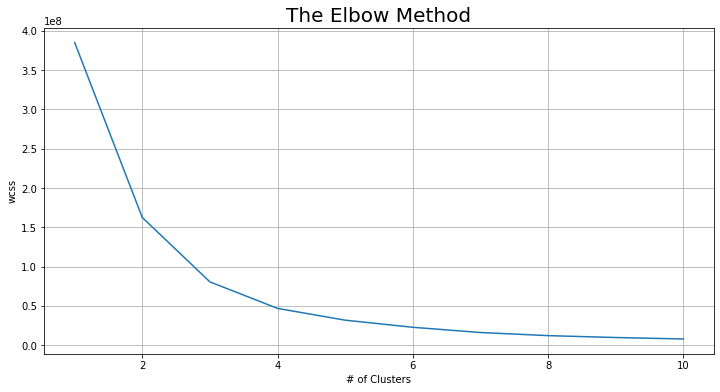

In [145]:
x = df[['Administrative_Duration','BounceRates']].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.grid()
# plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('# of Clusters')
plt.ylabel('wcss')
plt.show()

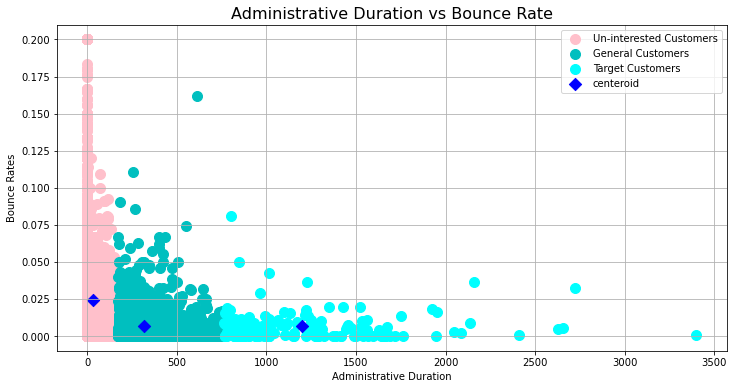

In [146]:
# based on the plot we will use 3 clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_means = km.fit_predict(x)

plt.figure(figsize=(12,6))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'c', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 75, c = 'blue' , label = 'centeroid', marker='D')

plt.title('Administrative Duration vs Bounce Rate', fontsize = 16)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Informational Duration

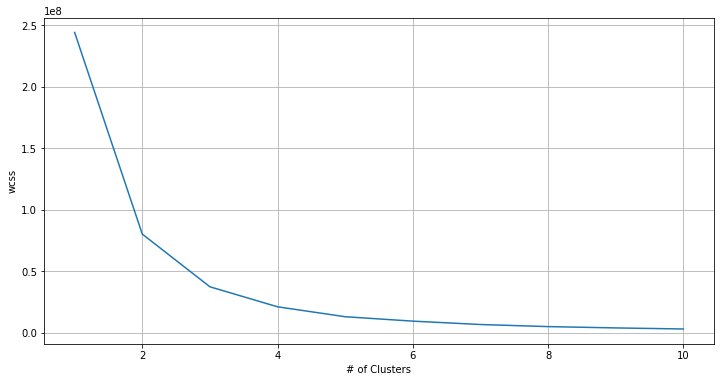

In [147]:
x = df[['Informational_Duration','BounceRates']].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.grid()
# plt.tight_layout()
plt.xlabel('# of Clusters')
plt.ylabel('wcss')
plt.show()

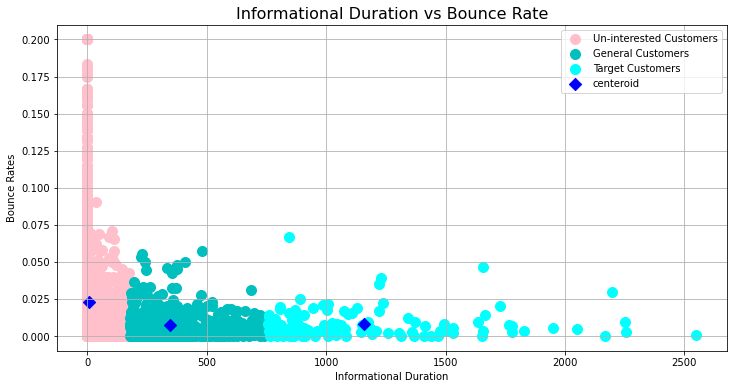

In [148]:
# based on the plot we will use 3 clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_means = km.fit_predict(x)

plt.figure(figsize=(12,6))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'c', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 75, c = 'blue' , label = 'centeroid', marker='D')

plt.title('Informational Duration vs Bounce Rate', fontsize = 16)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Product Related Duration

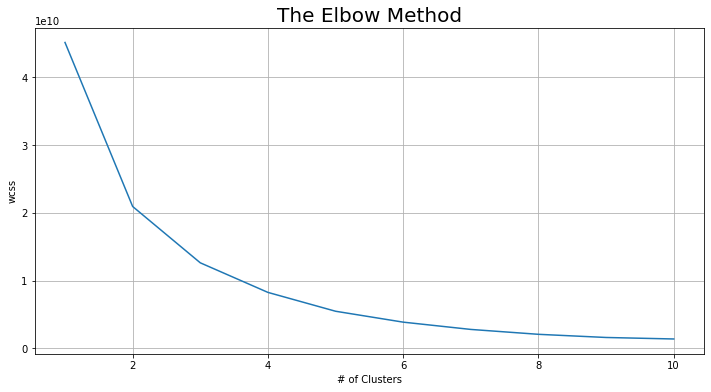

In [149]:
x = df[['ProductRelated_Duration','BounceRates']].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.grid()
# plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('# of Clusters')
plt.ylabel('wcss')
plt.show()

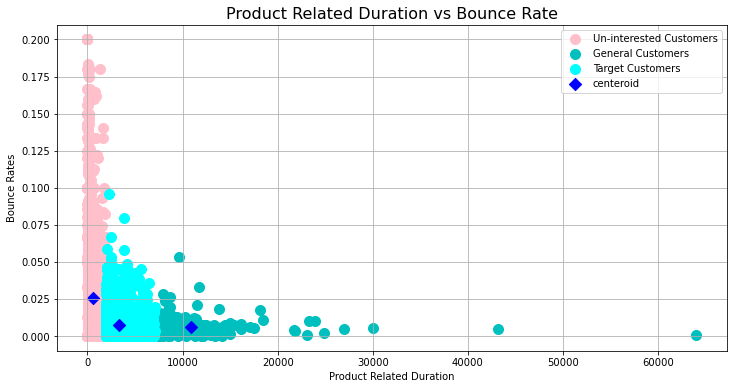

In [150]:
# based on the plot we will use 3 clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_means = km.fit_predict(x)

plt.figure(figsize=(12,6))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'c', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 75, c = 'blue' , label = 'centeroid', marker='D')

plt.title('Product Related Duration vs Bounce Rate', fontsize = 16)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()